<a href="https://colab.research.google.com/github/Alirezarahhmati/KaggleClaimFraudClassification/blob/Develop/FraudDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [1]:
import pandas as pd

data = pd.read_csv('/content/fraud_oracle.csv')
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


Check the summary statistics of the dataset

In [2]:
print(data.describe())

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000 

Check the class distribution (fraudulent vs. non-fraudulent)

In [3]:
print(data['FraudFound_P'].value_counts())

0    14497
1      923
Name: FraudFound_P, dtype: int64


the datas are so inbalance.

checking for missing value

In [4]:
# Check for missing values
print(data.isnull().sum())

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


This data do not have missed data.

count ploting of Fraud Report

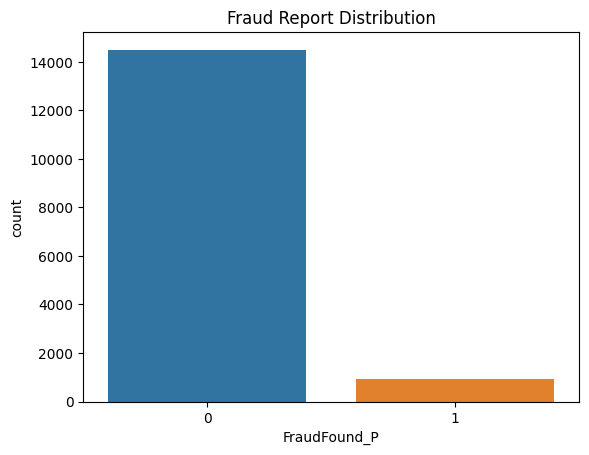

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of the target variable
sns.countplot(x='FraudFound_P', data=data)
plt.title('Fraud Report Distribution')
plt.show()

we can see again that our data are so inbalance

<ipython-input-6-fb41ded83ddf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


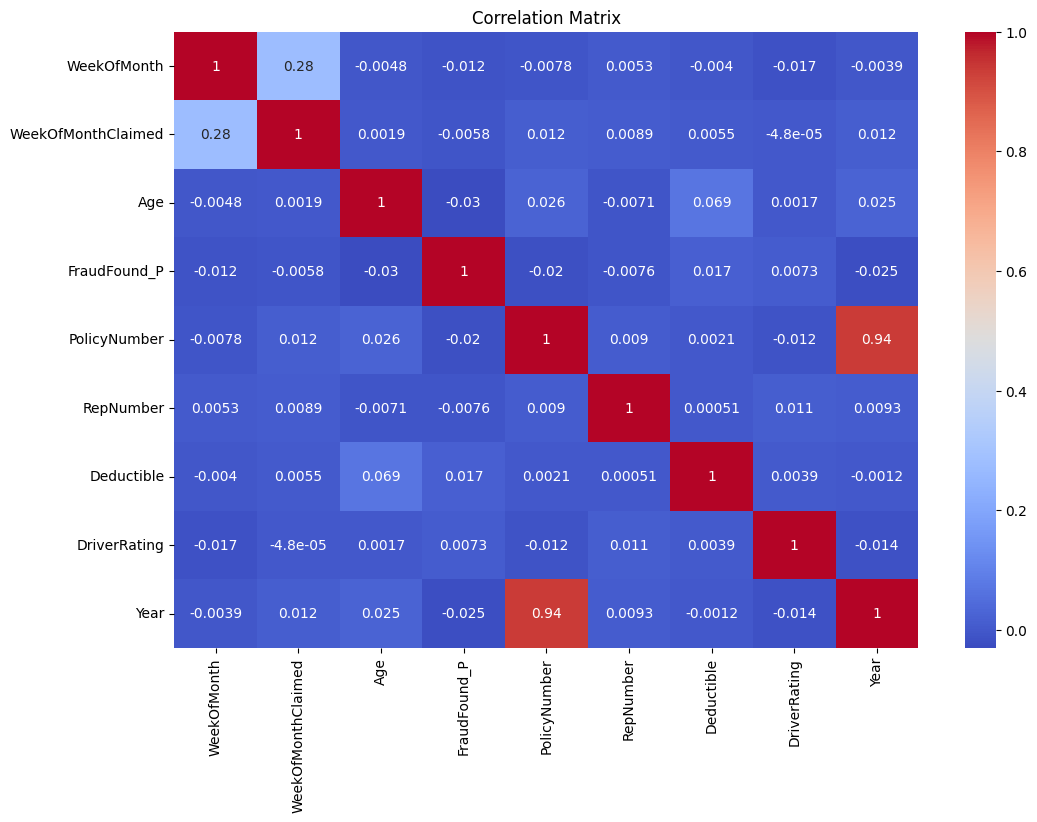

In [6]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

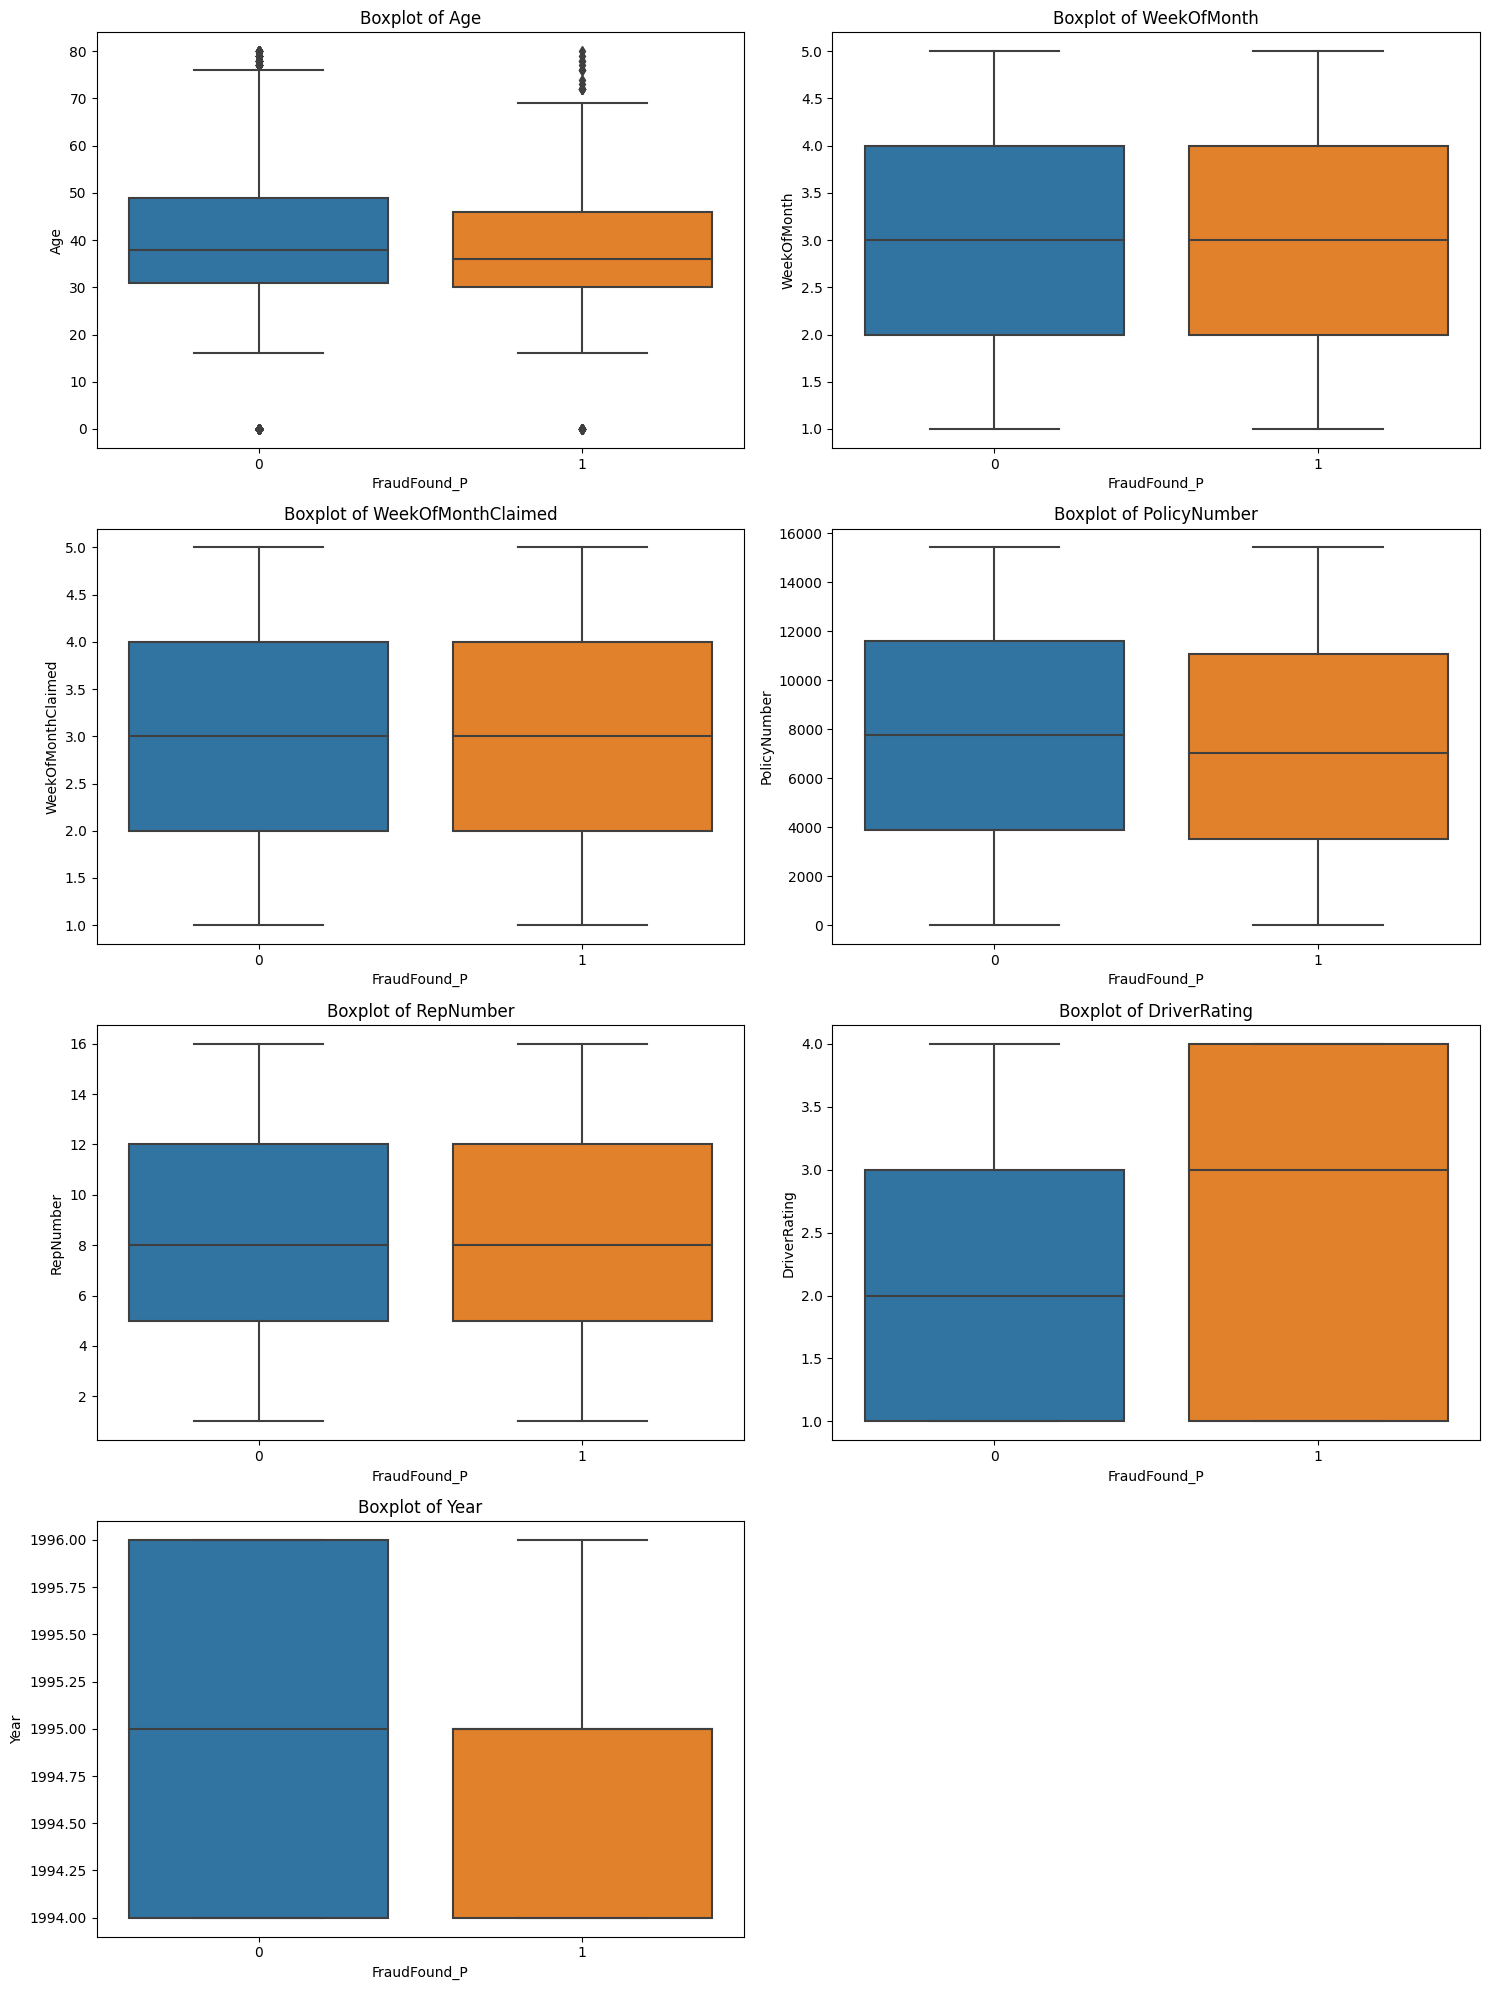

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of continuous features
continuous_cols = ['Age', 'WeekOfMonth', 'WeekOfMonthClaimed', 'PolicyNumber', 'RepNumber', 'DriverRating', 'Year']

# Calculate the number of rows and columns for subplots
num_plots = len(continuous_cols)
num_rows = int(num_plots/2) + num_plots%2
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over continuous columns and create subplots
for i, col in enumerate(continuous_cols):
    ax = axes[i]
    sns.boxplot(x='FraudFound_P', y=col, data=data, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    
# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

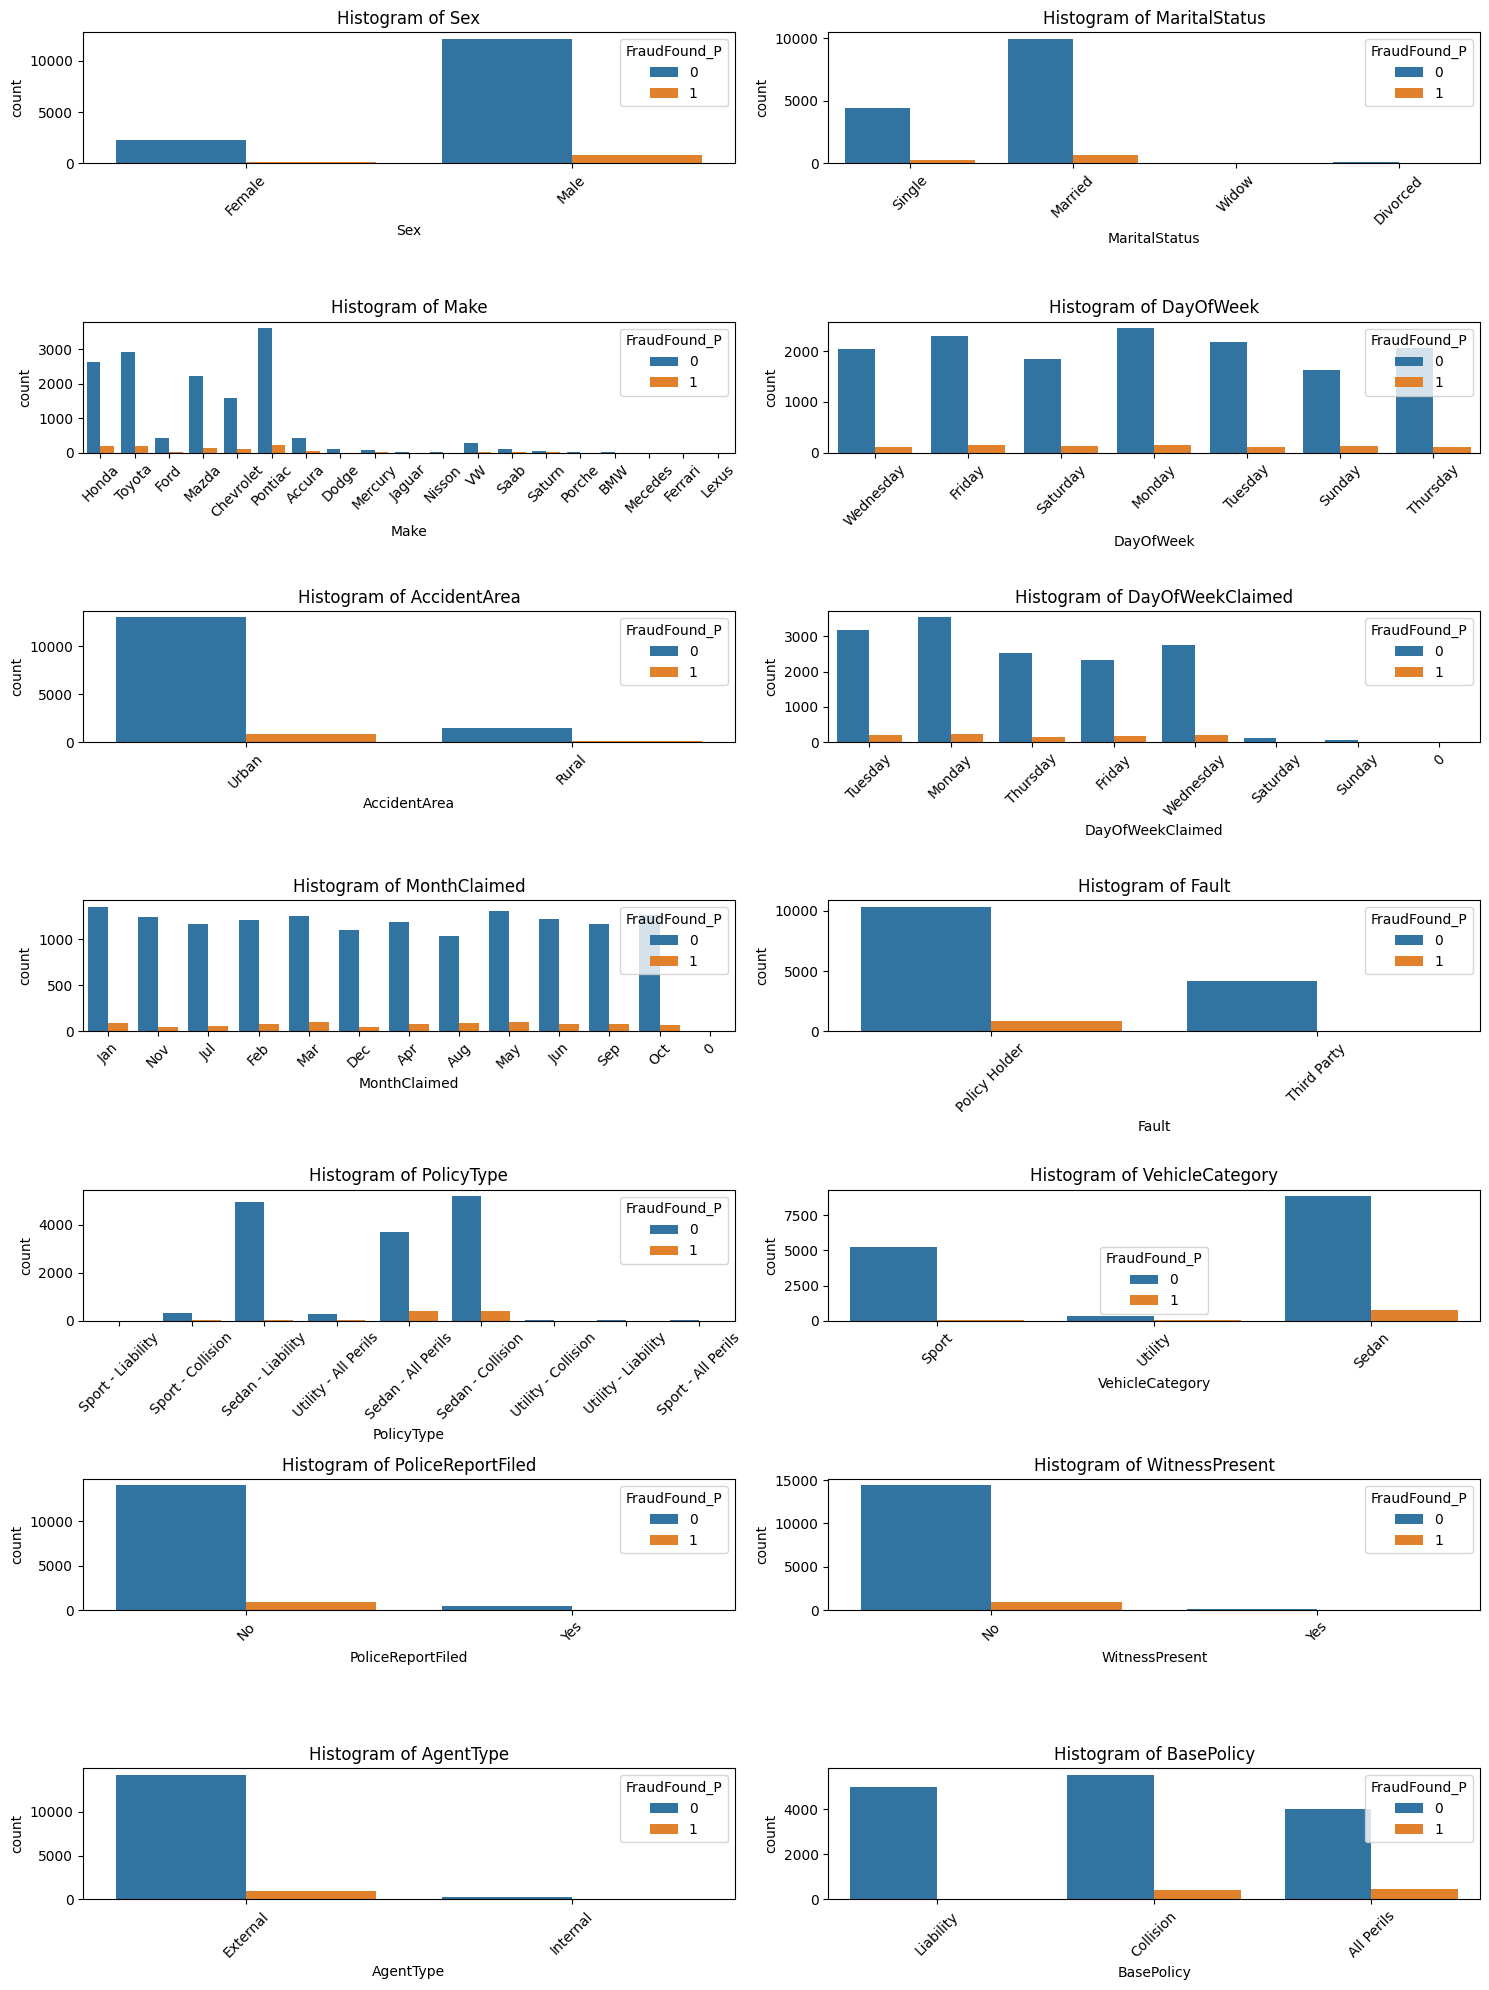

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of categorical features
categorical_cols = ['Sex', 'MaritalStatus', 'Make', 'DayOfWeek', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Fault', 'PolicyType', 'VehicleCategory', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'BasePolicy']

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_cols)
num_rows = int(num_plots/2) + num_plots%2
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over categorical columns and create subplots
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=col, hue='FraudFound_P', data=data, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
